# Algorithm Adaption

This notebook discusses Multi-label algorithm adaption methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Methods](#methods)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from joblib import dump, load
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')

X = get_X_reduced(preprocessing)
y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(X, y)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<a id='methods'/>

## Methods

scikit-multilearn:
- [MLkNN](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)
- [BRkNN](http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.brknn.BRkNNaClassifier)
- [MLTSVM](http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM)
- [MLARAM](http://scikit.ml/api/skmultilearn.adapt.mlaram.html#skmultilearn.adapt.MLARAM)

In [3]:
clf_paths = []
def create_classifier(classifier, name=False):
    clf = Classifier(classifier, preprocessing, name)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save('algorithm_adaption')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()
    clf_paths.append(path)

**MLkNN**

> Firstly, for each test instance, its k nearest neighbors in the training set are identified. Then, according to statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the test instance.
<cite>[Zhang & Zhou, 2007][1]</cite>

[1]: https://doi.org/10.1016/j.patcog.2006.12.019

In [4]:
from skmultilearn.adapt import MLkNN

create_classifier(MLkNN(), 'MLkNN')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 7409.826714515686s
Test: 2200.530954837799s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015335709285305161     0.028174123337363965     0.13211022821059096      0.09265215638855302      0.09807966788015154      
micro                                                            0.26878906817851433      0.08840122394339262      0.13304551178269475      
macro                                                            0.2742383130328399       0.08502324739182006      0.11536507783863943      


**BrkNN**

> an adaptation of the kNN algorithm for multilabel classification that is conceptually equivalent to using the popular Binary Relevance problem transformation method in conjunction with the kNN algorithm, but |L| times faster. [L = labels]
<cite>[Spyromitros et al., 2008][2]</cite>

[2]: https://doi.org/10.1007/978-3-540-87881-0_40


*BRkNNa*
>  This version of the classifier assigns the labels that are assigned to at least half of the neighbors.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNaClassifier

In [5]:
from skmultilearn.adapt import BRkNNaClassifier

create_classifier(BRkNNaClassifier(), 'BRkNNaClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 52.419026613235474s
Test: 2149.9405262470245s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013297269776618086     0.03530834340991536      0.005501813784764208     0.0025574365175332525    0.0033316059192721828    
micro                                                            0.6447368421052632       0.0023427041499330657    0.004668445121951219     
macro                                                            0.09083296476485331      0.0021044889019819343    0.0040257078226964196    


*BRkNNb*
>  This version of the classifier assigns the most popular m labels of the neighbors, where m is the average number of labels assigned to the object’s neighbors.
<cite>[skmultilearn][4]</cite>

[4]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNbClassifier

In [6]:
from skmultilearn.adapt import BRkNNbClassifier

create_classifier(BRkNNbClassifier(), 'BRkNNbClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 51.841198682785034s
Test: 2158.2909088134766s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.024589193661299562     0.0016928657799274486    0.020515920999596936     0.017644095122934297     0.018304255196637302     
micro                                                            0.01993823481605895      0.017594186268885065     0.018693012978437        
macro                                                            0.0002468660149210598    0.012105263157894735     0.0004822649449717397    


**MLTSVM**

<cite>[Chen et al., 2016][5]</cite>

> Twin multi-Label Support Vector Machines
<cite>[skmultilearn][6]</cite>

[5]: https://doi.org/10.1016/j.patcog.2015.10.008
[6]: http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM

In [7]:
from skmultilearn.adapt import MLTSVM

# TODO(FIX): executes with error
#create_classifier(MLTSVM(c_k = 2**-1), 'MLTSVM()')

**MLARAM**

> an extension of fuzzy Adaptive Resonance Associative Map (ARAM) – an Adaptive Resonance Theory (ART)based neural network. It aims at speeding up the classification process in the presence of very large data.
<cite>[F. Benites & E. Sapozhnikova, 2015][7]</cite>

[7]: https://doi.org/10.1109/ICDMW.2015.14

In [8]:
from skmultilearn.adapt import MLARAM

create_classifier(MLARAM(), 'MLARAM')

Training: 63.281604290008545s
Test: 10540.413585186005s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.04877489976452619      0.0032648125755743653    0.06493662199179082      0.1769528415961306       0.07572893557711445      
micro                                                            0.05906184718617459      0.17842799770510614      0.08874726529059261      
macro                                                            0.073959154388694        0.04972446417106336      0.016834037017964553     


## Evaluation

In [8]:
paths = available_classifier_paths('algorithm_adaption')
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

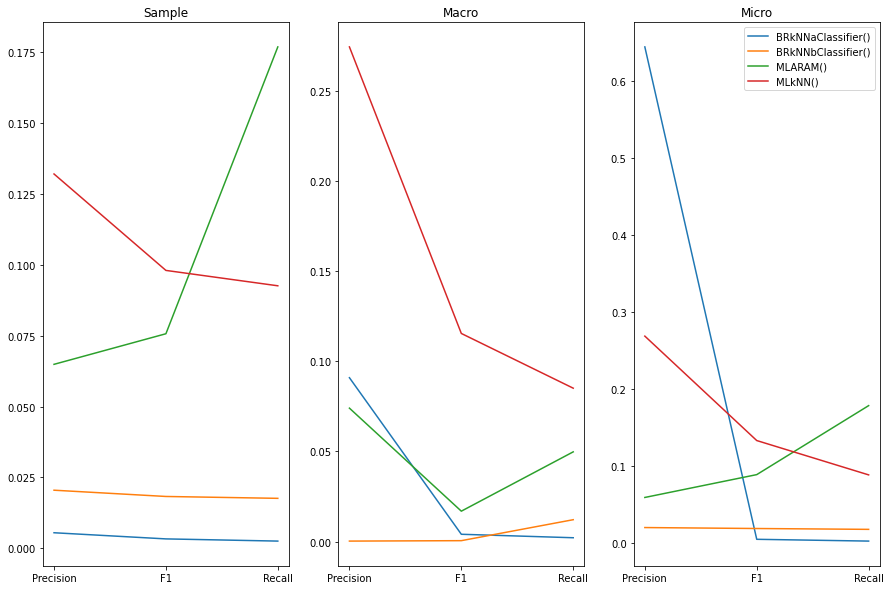

In [9]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [10]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[0:3]

In [11]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    classwise_results.append((clf, classification_report(y_test, prediction, output_dict=True, zero_division=0)))

MLkNN()
MLARAM()
BRkNNaClassifier()


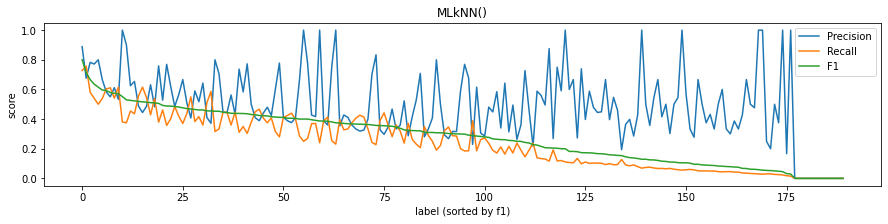

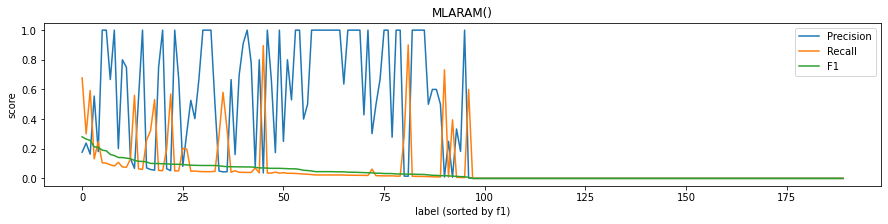

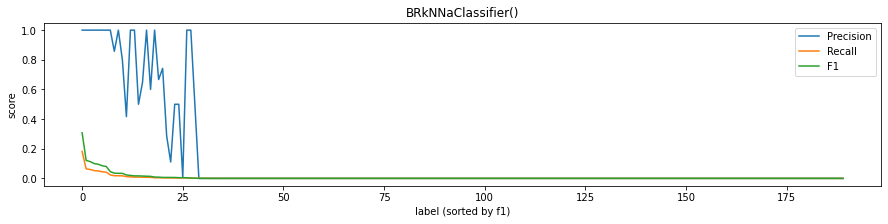

In [12]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['f1-score'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.set_xlabel('label (sorted by f1)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()